In [2]:
from pathlib import Path
import pandas as pd
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [3]:
data = Path('cleaned_data.csv')
df = pd.read_csv(data)
clean_df = df.drop(columns="STABBR")
clean_df.head()

,Unnamed: 0,UNITID,HIGHDEG,CONTROL,ADM_RATE_ALL,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,MD_EARN_WNE_P10,COMPL_RPY_3YR_RT
0,0,100654,4,1,0.716006,21924.0,10024.0,18634.0,39059.0,0.429326
1,1,100663,4,1,0.885352,26248.0,8568.0,20400.0,50907.0,0.618270
2,3,100706,4,1,0.736724,24869.0,11488.0,23884.0,56901.0,0.680887
3,4,100724,4,1,0.979913,21938.0,11068.0,19396.0,34018.0,0.366038
4,5,100751,4,1,0.789043,31050.0,11620.0,31090.0,56118.0,0.711801


In [3]:
clean_df['chance_payoff'] = df['COMPL_RPY_3YR_RT'].apply(lambda x: 1 if x > 0.8 else 0)
clean_df.head()

,Unnamed: 0,UNITID,HIGHDEG,CONTROL,ADM_RATE_ALL,COSTT4_A,TUITIONFEE_IN,TUITIONFEE_OUT,MD_EARN_WNE_P10,COMPL_RPY_3YR_RT,chance_payoff
0,0,100654,4,1,0.716006,21924.0,10024.0,18634.0,39059.0,0.429326,0
1,1,100663,4,1,0.885352,26248.0,8568.0,20400.0,50907.0,0.618270,0
2,3,100706,4,1,0.736724,24869.0,11488.0,23884.0,56901.0,0.680887,0
3,4,100724,4,1,0.979913,21938.0,11068.0,19396.0,34018.0,0.366038,0
4,5,100751,4,1,0.789043,31050.0,11620.0,31090.0,56118.0,0.711801,0


In [ ]:
# clean_df['chance_payoff'] = df['COMPL_RPY_3YR_RT'].apply(lambda x: 5 if x > 0.8 else (4 if x > 0.7 else (3 if x > 0.6 else (2 if x > 0.5 else (1 if x>0.4 else 0)))))
# clean_df.head()

In [4]:
y = clean_df["chance_payoff"]
X = clean_df.drop(columns=["chance_payoff","COMPL_RPY_3YR_RT"])

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(1200, 9)

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

In [7]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [8]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8191666666666667
Testing Data Score: 0.8154613466334164


In [9]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,1
6,0,0
7,0,1
8,0,1
9,0,0


In [10]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.8154613466334164

In [11]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!
training_matrix = confusion_matrix(y_test, predictions)
training_matrix

array([[266,  17],
       [ 57,  61]])

In [12]:
# Print the classification report for the model
# YOUR CODE HERE!
target_names = ["0_low repay", "1_high repay"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

 0_low repay       0.82      0.94      0.88       283
1_high repay       0.78      0.52      0.62       118

    accuracy                           0.82       401
   macro avg       0.80      0.73      0.75       401
weighted avg       0.81      0.82      0.80       401



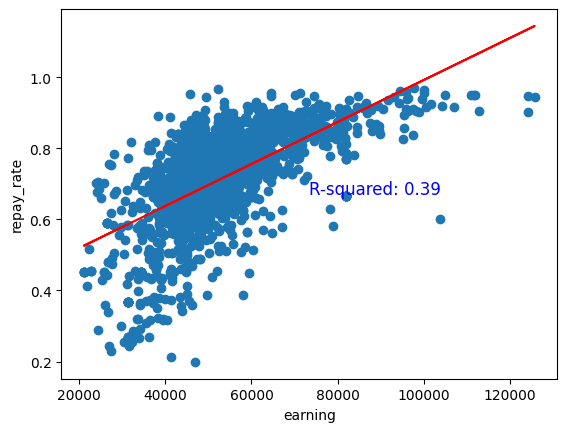

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X = clean_df.iloc[:, 8].values.reshape(-1, 1)
Y = clean_df.iloc[:, 9].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

# Calculate R-squared
r_squared = r2_score(Y, Y_pred)

# Create the scatter plot
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel('earning')  # Replace 'X-axis Label' with your actual x-axis label
plt.ylabel('repay_rate')  # Replace 'Y-axis Label' with your actual y-axis label

# Annotate the plot with only the R-squared value
plt.annotate(f'R-squared: {r_squared:.2f}', xy=(0.5, 0.5), xycoords='axes fraction', fontsize=12, color='blue')

plt.show()